Epoch 1/5


C:\Users\ASHMITA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 260ms/step - accuracy: 0.2850 - loss: 2.0034 - val_accuracy: 0.4567 - val_loss: 1.6441
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.4269 - loss: 1.6385 - val_accuracy: 0.5029 - val_loss: 1.4796
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 296ms/step - accuracy: 0.4688 - loss: 1.5224 - val_accuracy: 0.5245 - val_loss: 1.4036
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 304ms/step - accuracy: 0.4947 - loss: 1.4524 - val_accuracy: 0.5396 - val_loss: 1.3548
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 219s 350ms/step - accuracy: 0.5089 - loss: 1.4056 - val_accuracy: 0.5515 - val_loss: 1.3153
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 275ms/step - accuracy: 0.5387 - loss: 1.3396
Test Accuracy: 53.87%
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 276ms/step
              precision    recall  f1-score   support

           0       0.59      0.62      0.60      1000
           1       0.56      0.59      0.58      1000
           2       0.50      0.37      0.42     

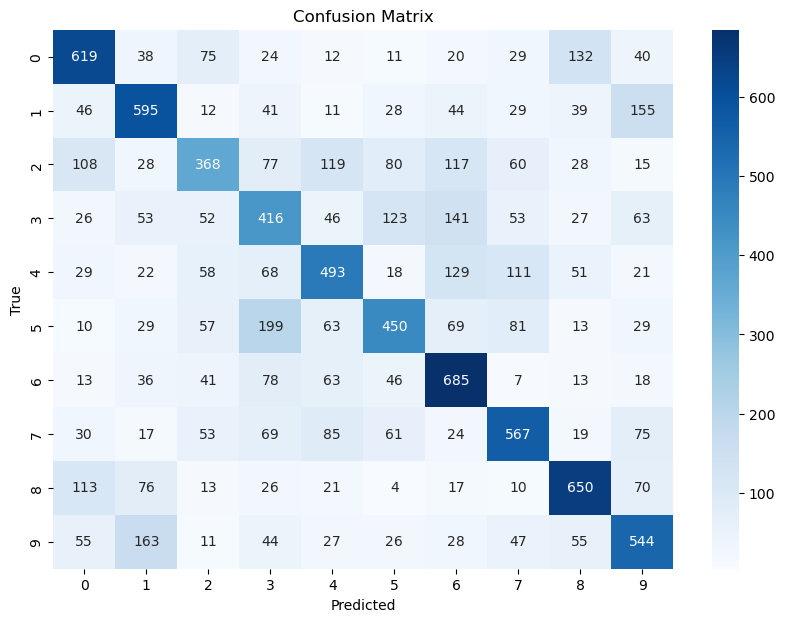

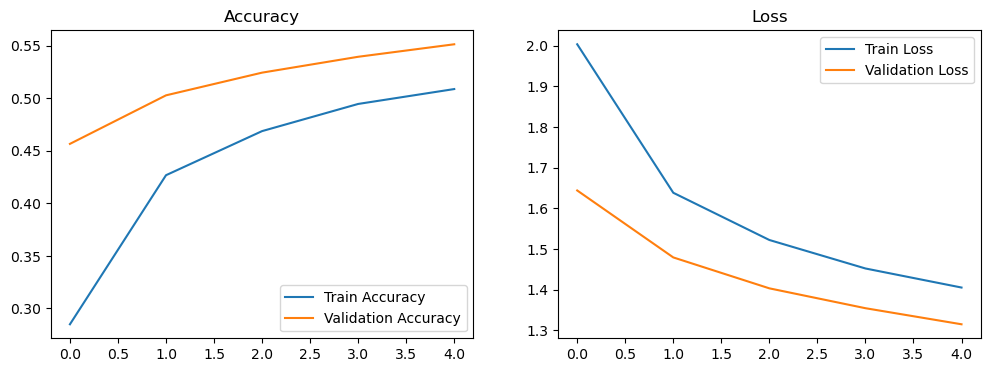

In [1]:
# Ex No: 4 TRANSFER LEARNING WITH CNN AND VISUALIZATION

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ===============================
# Step 1: Load CIFAR-10 dataset
# ===============================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

num_classes = 10
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ===============================
# Step 2: ImageDataGenerator (rescale + split)
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=64,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=64,
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow(
    x_test, y_test,
    batch_size=64,
    shuffle=False
)

# ===============================
# Step 3: Build Transfer Learning Model (VGG16)
# ===============================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ===============================
# Step 4: Compile Model
# ===============================
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# Step 5: Train Model
# ===============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# ===============================
# Step 6: Evaluate Model
# ===============================
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# ===============================
# Step 7: Predictions & Confusion Matrix
# ===============================
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ===============================
# Step 8: Training Visualization
# ===============================
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()
